# **MODELADO PARA PRECIPITACIÓN EN PUEBLA CON TRANSFORMACION YEO-JHONSON**

Ubicación de la estación: 19.0000, -98.1833




Precipitación v4:  
https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-monthly
https://www.ncei.noaa.gov/data/ghcnm/v4/precipitation/
https://www.ncei.noaa.gov/pub/data/ghcn/v4/products/StationPlots/MX/


Nombres:  
https://www.ncei.noaa.gov/pub/data/ghcn/v4/  
https://www.ncei.noaa.gov/data/ghcnm/v4/precipitation/doc/


### *Configuración de la Notebook*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid")

In [3]:
# The color palette is made up of the 20 colors. Hex color codes:  #395e77, #413344,  #614c65,  #806485,  #936397,  #a662a8,  #664972,  #463c57,  #6e8da9,  #91bcdd,  #567d99,  #305662,  #264d4d,  #315c45,  #8a9a65,  #b6b975,  #b65d54,  #b60033,  #98062d and  #800022.
# https://colorkit.co/palette/413344-614c65-806485-936397-a662a8-664972-463c57-6e8da9-91bcdd-567d99-395e77-305662-264d4d-315c45-8a9a65-b6b975-b65d54-b60033-98062d-800022/
sns.set_palette(["#194a7a", "#b60033", "#315c45", "#b65d54", "#B9445F", "#567d99", "#395e77", "#413344", "#614c65", "#806485", "#936397", "#a662a8", "#664972", "#463c57", "#6e8da9", "#91bcdd", "#305662", "#264d4d",  "#8a9a65", "#b6b975", "#98062d", "#800022"])
sns.color_palette()

[(0.09803921568627451, 0.2901960784313726, 0.47843137254901963),
 (0.7137254901960784, 0.0, 0.2),
 (0.19215686274509805, 0.3607843137254902, 0.27058823529411763),
 (0.7137254901960784, 0.36470588235294116, 0.32941176470588235),
 (0.7254901960784313, 0.26666666666666666, 0.37254901960784315),
 (0.33725490196078434, 0.49019607843137253, 0.6),
 (0.2235294117647059, 0.3686274509803922, 0.4666666666666667),
 (0.2549019607843137, 0.2, 0.26666666666666666),
 (0.3803921568627451, 0.2980392156862745, 0.396078431372549),
 (0.5019607843137255, 0.39215686274509803, 0.5215686274509804),
 (0.5764705882352941, 0.38823529411764707, 0.592156862745098),
 (0.6509803921568628, 0.3843137254901961, 0.6588235294117647),
 (0.4, 0.28627450980392155, 0.4470588235294118),
 (0.27450980392156865, 0.23529411764705882, 0.3411764705882353),
 (0.43137254901960786, 0.5529411764705883, 0.6627450980392157),
 (0.5686274509803921, 0.7372549019607844, 0.8666666666666667),
 (0.18823529411764706, 0.33725490196078434, 0.3843137254901961),
 (0.14901960784313725, 0.30196078431372547, 0.30196078431372547),
 (0.5411764705882353, 0.6039215686274509, 0.396078431372549),
 (0.7137254901960784, 0.7254901960784313, 0.4588235294117647),
 (0.596078431372549, 0.023529411764705882, 0.17647058823529413),
 (0.5019607843137255, 0.0, 0.13333333333333333)]

In [4]:
# Personalización global con matplotlib
plt.rcParams.update({
    'axes.titlesize': 14,        # Tamaño del título
    'axes.titleweight': 'bold',  # Negrita en el título
    'xtick.labelsize': 8,        # Tamaño de los xticks
    'ytick.labelsize': 8,         # Tamaño de los yticks
    'grid.color': 'gray',         # Color de las líneas del grid
    'grid.linestyle': '--',       # Estilo de línea (puede ser '-', '--', '-.', ':')
    'grid.linewidth': 0.5,        # Grosor del grid
    'axes.grid': True,            # Asegura que el grid esté activado
    'axes.grid.axis': 'both',     # Aplica el grid a ambos ejes
    'lines.linewidth': 1.2,       # Grosor de las líneas
    'figure.figsize': (12, 6),   # Tamaño de la figura
})

### *Cargar Datos*

In [5]:
data=pd.read_csv('MXN00021035.csv')

In [6]:
pre=data.iloc[:,6]  # Precipitacion, es la columna 5
date=data.iloc[:,5] # Date, es la columna 6
date = date.astype(str).str.replace(r'(\d{4})(\d{2})', r'\1/\2', regex=True)    # La fecha está como 195210 y la pasamos a 1952/10 
date = pd.to_datetime(date, format='%Y/%m')                                     # Lo convertimos en fecha
pre = pd.Series(pre.values, index=date)                                         # Creamos una Serie
pre

195209
1952-10-01     174
1952-11-01     592
1952-12-01       0
1953-04-01      47
1953-05-01     137
              ... 
2009-08-01    1474
2009-09-01    3161
2009-10-01    1190
2009-11-01     155
2009-12-01      51
Length: 672, dtype: int64

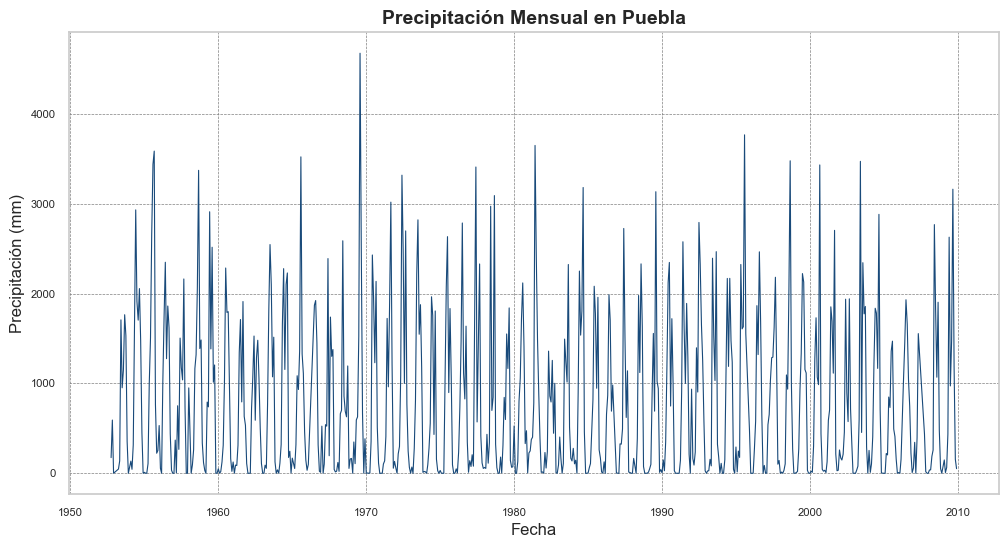

In [7]:
plt.figure()
plt.plot(pre, linewidth=0.8)
plt.xlabel("Fecha")
plt.ylabel("Precipitación (mm)")
plt.title("Precipitación Mensual en Puebla")
plt.savefig('imagenes/01-precipitacion.svg', bbox_inches='tight')
plt.show()

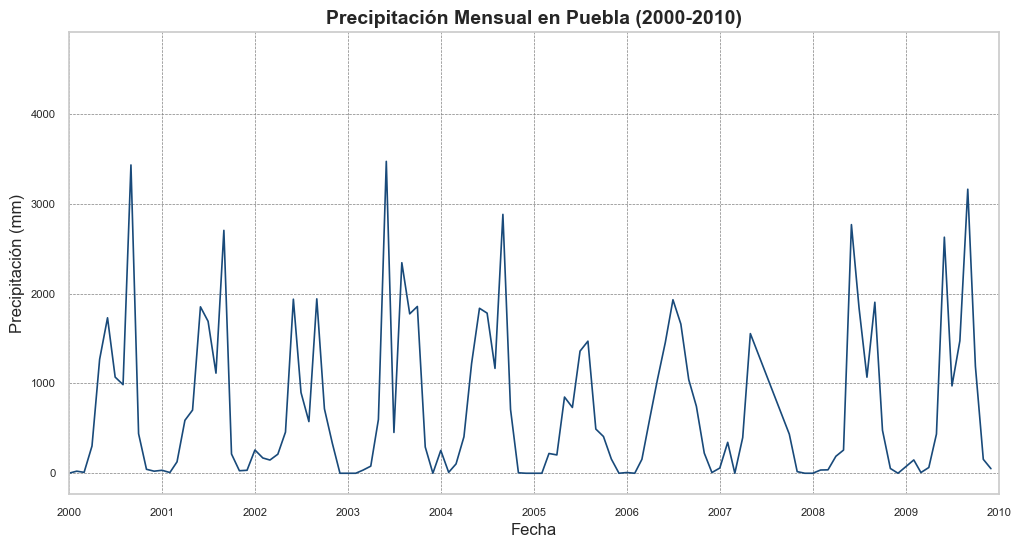

In [8]:
plt.figure()
plt.plot(pre)
plt.xlabel("Fecha")
plt.ylabel("Precipitación (mm)")
plt.title("Precipitación Mensual en Puebla (2000-2010)")
plt.xlim(pd.Timestamp('2000-01-01'), pd.Timestamp('2010-01-01')) 
plt.savefig('imagenes/01-2-precipitacion.svg', bbox_inches='tight')
plt.show()

# **TRANSFORMACIÓN**

Definición **matemática** de la **transformación Yeo-Johnson**, como se encuentra en la literatura estadística (propuesta por Ingram Olkin y I. Paul Yeo & R. J. Johnson en 2000).

Sea $x \in \mathbb{R}$ un valor (puede ser negativo, cero o positivo). La transformación $T(x; \lambda)$ se define como:

$$
T(x; \lambda) =
\begin{cases}
\frac{[(x + 1)^\lambda - 1]}{\lambda} & \text{si } x \geq 0, \, \lambda \ne 0 \\
\log(x + 1) & \text{si } x \geq 0, \, \lambda = 0 \\
-\frac{[(-x + 1)^{2 - \lambda} - 1]}{2 - \lambda} & \text{si } x < 0, \, \lambda \ne 2 \\
-\log(-x + 1) & \text{si } x < 0, \, \lambda = 2
\end{cases}
$$

La **corrección de sesgo** en la transformación Yeo-Johnson es un detalle técnico importante cuando se usa con la opción `standardize=True` en `scikit-learn` y otras implementaciones.

Cuando transformás datos para que se parezcan a una distribución normal, podés terminar con una media y varianza que no están exactamente en 0 y 1. La **corrección de sesgo** es una **estandarización posterior** que asegura que los datos transformados tengan:

- media 0
- desviación estándar 1

Esto **no forma parte de la transformación Yeo-Johnson en sí**, sino que es un **post-procesamiento** adicional. Pero es importante cuando vas a usar modelos sensibles a escalas.

Supongamos que $T(x_i; \lambda)$ es el valor transformado de $x_i$. Entonces, la corrección de sesgo se hace con una estandarización clásica:

$$
z_i = \frac{T(x_i; \lambda) - \mu_T}{\sigma_T}
$$

donde:

- $\mu_T = \frac{1}{n} \sum_{i=1}^{n} T(x_i; \lambda)$ es la **media** de los datos transformados
- $\sigma_T = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (T(x_i; \lambda) - \mu_T)^2}$ es la **desviación estándar**

### **Estimador puntual**

In [9]:
from sklearn.preprocessing import PowerTransformer
import numpy as np

In [ ]:
X = pre.values.reshape(-1, 1)

# Ajuste original para obtener lambda estimado
pt = PowerTransformer(method='yeo-johnson', standardize=False)
ypre = pt.fit_transform(X)
lambda_est = pt.lambdas_[0]

In [11]:
print("Lambda estimado:", pt.lambdas_)  # Obtener el valor lambda estimado

Lambda estimado: [0.23801569]


### **IC**

In [ ]:
# Bootstrap para el IC de lambda
n_boot = 1000
lambdas_boot = []

for _ in range(n_boot):
    sample = np.random.choice(X.flatten(), size=len(X), replace=True).reshape(-1, 1)
    pt_boot = PowerTransformer(method='yeo-johnson', standardize=False)
    pt_boot.fit(sample)
    lambdas_boot.append(pt_boot.lambdas_[0])

# Calcular percentiles para el intervalo de confianza al 95%
ci_lower = np.percentile(lambdas_boot, 2.5)
ci_upper = np.percentile(lambdas_boot, 97.5)

print(f"Estimación de λ: {lambda_est:.4f}")
print(f"IC 95% para λ: ({ci_lower:.4f}, {ci_upper:.4f})")


Estimación de λ: 0.2380
IC 95% para λ: (0.2065, 0.2680)


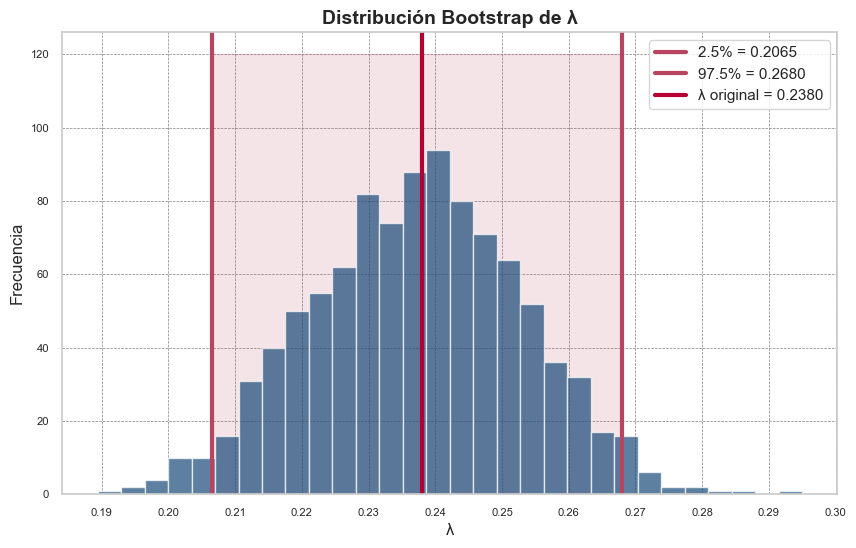

In [13]:
# Gráfico opcional del histograma de los λ bootstrap
plt.figure(figsize=(10, 6))
plt.fill_betweenx([0, 120], ci_lower, ci_upper, color=sns.color_palette()[4], alpha=0.15)
plt.hist(lambdas_boot, bins=30, alpha=0.7, edgecolor='white')
plt.axvline(ci_lower, label=f'2.5% = {ci_lower:.4f}', color=sns.color_palette()[4], linewidth=3)
plt.axvline(ci_upper, label=f'97.5% = {ci_upper:.4f}', color=sns.color_palette()[4], linewidth=3)
plt.axvline(lambda_est, label=f'λ original = {lambda_est:.4f}', color=sns.color_palette()[1], linewidth=3)
plt.title('Distribución Bootstrap de λ')
plt.xlabel('λ')
plt.ylabel('Frecuencia')
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.01))
plt.savefig('imagenes/02-lambda-yj-bootstrapping.svg', bbox_inches='tight')
plt.show()

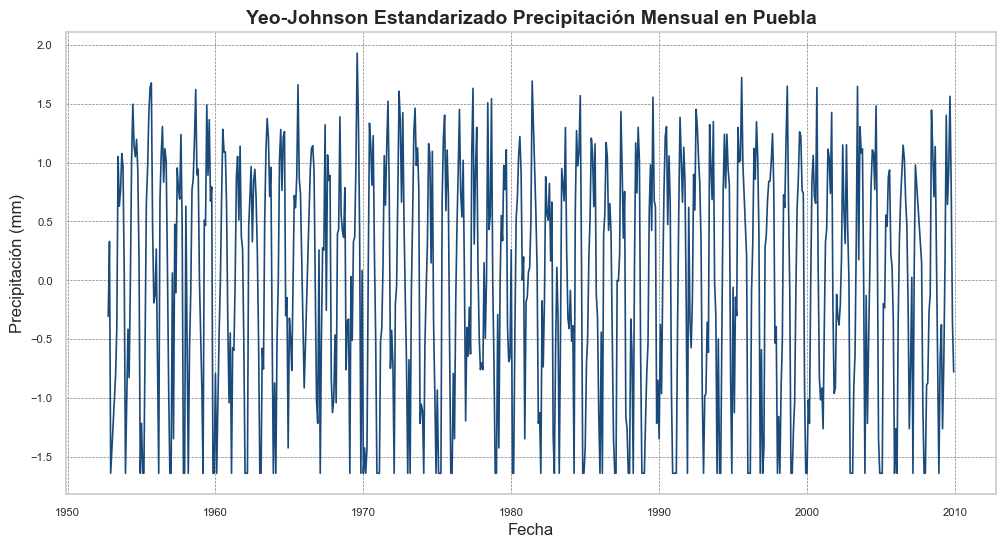

In [14]:
plt.figure()
plt.plot(date, ypre)
plt.xlabel("Fecha")
plt.ylabel("Precipitación (mm)")
plt.title("Yeo-Johnson Estandarizado Precipitación Mensual en Puebla")
plt.savefig('imagenes/03-precipitacion_yeo_johnson.svg', bbox_inches='tight')
plt.show()

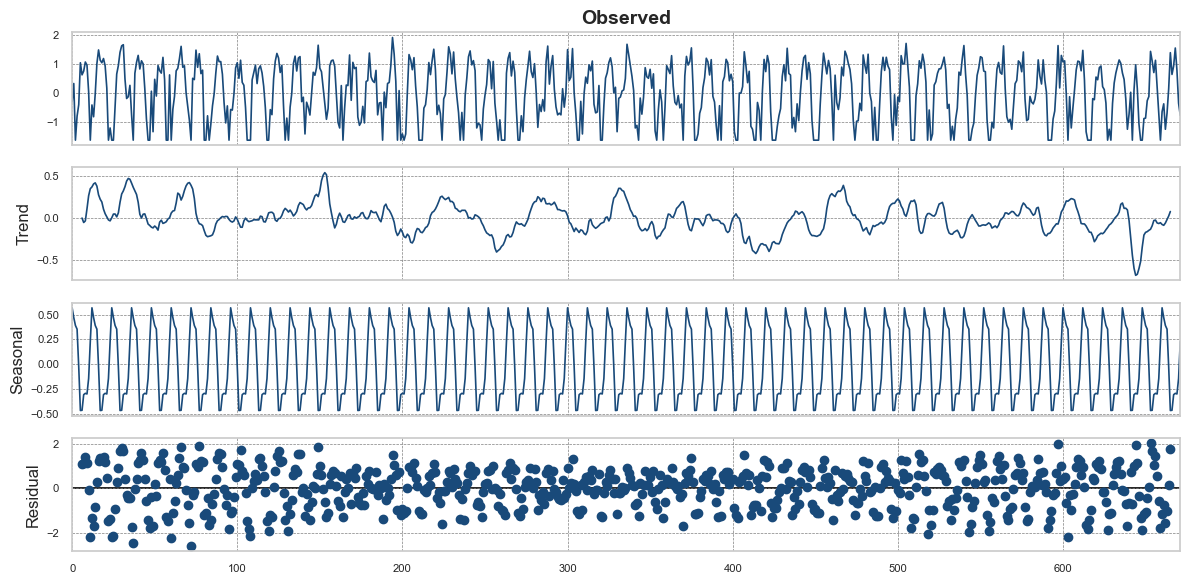

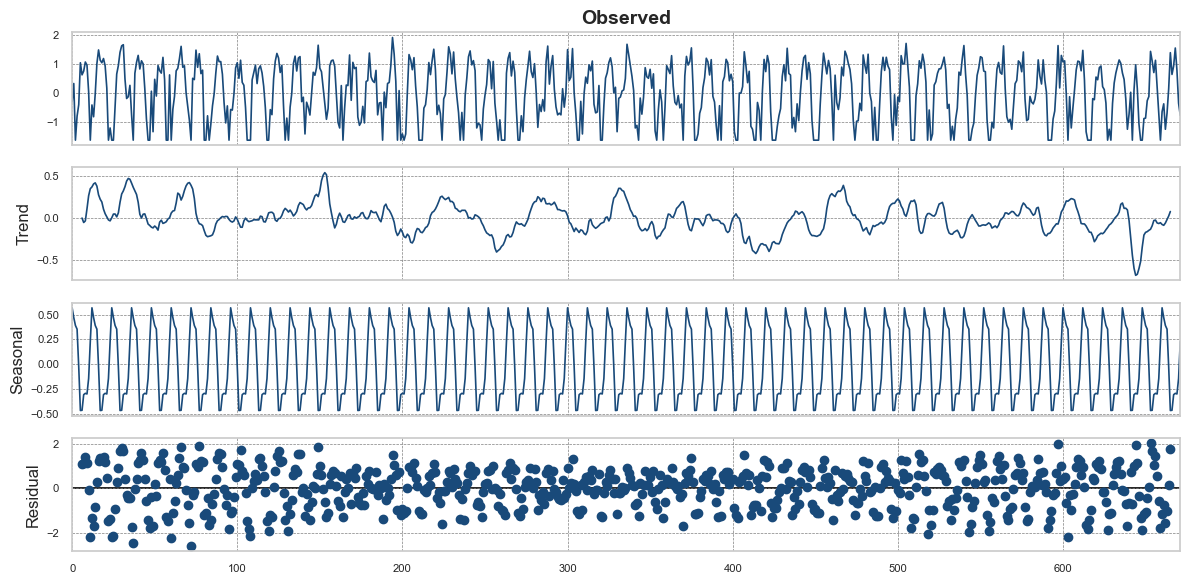

In [15]:
# Identificar estacionalidad
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición estacional
result = seasonal_decompose(ypre, model='additive', period=12)  # Cambia 'period' según la frecuencia de tus datos
result.plot()

# **TRAIN Y TEST**

In [ ]:
# Partir la serie para train y test
ypre_total = ypre.copy()          # Copia de la serie original

# Todas hasta los ultimos 12 meses
ypre = ypre_total[:-12]           # Entrenamiento: todos menos los últimos 12 meses
ypre_test = ypre_total[-12:]      # Test: últimos 12 meses

# **ESTACIONARIEDAD**

In [16]:
from statsmodels.tsa.stattools import adfuller  

In [96]:
adfuller(ypre)

(np.float64(-7.092601622125712),
 np.float64(4.370937974226262e-10),
 17,
 654,
 {'1%': np.float64(-3.440388459298194),
  '5%': np.float64(-2.8659694611921034),
  '10%': np.float64(-2.569128861019929)},
 np.float64(1158.2583743431305))

In [97]:
estacionariedad = adfuller(ypre)

if estacionariedad[1] < 0.05:
    print("La serie es estacionaria", estacionariedad[1])

La serie es estacionaria 4.370937974226262e-10


## **AUTOCORRELACIONES**

In [98]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, acf, pacf
import matplotlib.pyplot as plt
from fac_y_facps_significativas import *    # Este es el archivo que se usa para el curso

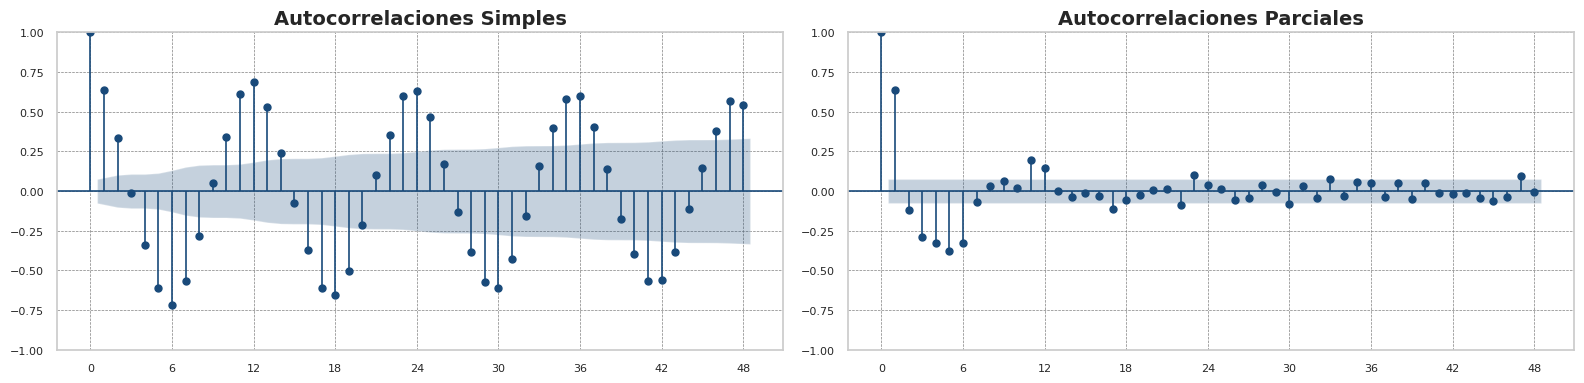

In [99]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

plot_acf(ypre, lags=48, ax=axs[0])
axs[0].xaxis.set_major_locator(plt.MultipleLocator(6))

# axs[0].set_ylim(-0.04, 0.04)
axs[0].set_title('Autocorrelaciones Simples')

plot_pacf(ypre, lags=48, ax=axs[1])
# axs[1].set_ylim(-0.04, 0.04)
axs[1].set_title('Autocorrelaciones Parciales')
axs[1].xaxis.set_major_locator(plt.MultipleLocator(6))

plt.tight_layout()
plt.savefig('imagenes/04-acf_pacf.svg', bbox_inches='tight')
plt.show()


In [100]:
fac = FAC(len(ypre), acf(ypre, nlags=24)[1:] )

Valores de autocorrelacion significativos:
r1: 0.6342847387425631
r2: 0.3322009206680224
r4: -0.3386012667475899
r5: -0.6115854475702547
r6: -0.7190648308075895
r7: -0.5691325786877741
r8: -0.2839363213168529
r10: 0.3412293944327521
r11: 0.613088008640551
r12: 0.6874989600822965
r13: 0.5275914269967102
r14: 0.24147272918399632
r16: -0.3719149280712862
r17: -0.6128107061643207
r18: -0.6535427016550233
r19: -0.5005469564429801
r22: 0.3535761456770601
r23: 0.5989723862319
r24: 0.6278045317141531


In [101]:
facp = FACP(len(ypre), pacf(ypre, nlags=24)[1:])

Valores de autocorrelacion parcial significativos:
rho 1: 0.6352300215126712
rho 2: -0.11789881064955397
rho 3: -0.29409422369935306
rho 4: -0.3284863556530342
rho 5: -0.3857613954555211
rho 6: -0.3320625526317802
rho 11: 0.20313139379301662
rho 12: 0.1562940716613224
rho 17: -0.12206771400339961
rho 22: -0.08796950273764118
rho 23: 0.1090512634071366


# **MODELADO**

Ver 02-Ordenar-Modelos y 03-Encontrar-un-Modelo-que-Cumpla

In [102]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [103]:
# import pmdarima as pm

In [ ]:
# # Encontrar el mejor SARIMA, Basado en ul AIC 
# auto_sarima_model = pm.auto_arima(ypre, 
#                                   seasonal=True, 
#                                   m=12,
#                                   stepwise=True, 
#                                   suppress_warnings=True, 
#                                   trace=True)

In [2]:
from modulo_raices import * # Una funcion que hice para verificar si los parametros son estacionarios e invertibles

In [162]:
alpha = 0.10

In [167]:
def parsimonia():
    if np.any(modelo.pvalues > alpha):
        print("Hay coeficientes no significativos, no se cumple el principio de parsimonia")
    else:
        print(":)")

## **14° Modelo con mejor AIC**

In [176]:
modelo=SARIMAX(ypre,
               order=(2,0,3),
               seasonal_order=(0,0,0,12)).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  672
Model:               SARIMAX(2, 0, 3)   Log Likelihood                -598.582
Date:                Thu, 24 Apr 2025   AIC                           1209.165
Time:                        15:53:30   BIC                           1236.227
Sample:                             0   HQIC                          1219.646
                                - 672                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7172      0.005    336.971      0.000       1.707       1.727
ar.L2         -0.9920      0.005   -184.716      0.000      -1.003      -0.981
ma.L1         -1.4724      0.034    -43.065      0.000      -1.539      -1.405
ma.L2          0.6803      0.058     11.760      0.000       0.567       0.794
ma.L3          0.0867      0.036      2.387      0.017       0.016       0.158
sigma2         0.3459      0.018     19.654      0.000       0.311       0.380
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 9.68
Prob(Q):                              0.95   Prob(JB):                         0.01
Heteroskedasticity (H):               0.91   Skew:                            -0.19
Prob(H) (two-sided):                  0.48   Kurtosis:                         3.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""


$$
\text{ARIMA}(2,0,3) \times (0,0,0)_{12}
$$

con los coeficientes:

- AR(1): $\phi_1 = -1.7104$
- AR(2): $\phi_2 = 0.9855$
- MA(1): $\theta_1 = -1.4789$
- MA(2): $\theta_2 = 0.7053$
- MA(3): $\theta_3 = 0.0654$
$$
(1
- 1.7104 \, B 
+ 0.9855 \, B^2)W_t=
(1
- 1.4789 \, B 
+ 0.7053 \, B^2 
+ 0.0654 \, B^3)\varepsilon_{t}
$$

$W_t = T(X_t)$ con la transformación de Yeo-Johnson y $\varepsilon_t \sim \mathcal{N}(0, 1)$

In [ ]:
parsimonia()

In [ ]:
modulo_raices_12(p1=-modelo.params[0], p2=-modelo.params[1])

Raíces del polinomio característico: [-1.39938942+0.j         -1.16049648+0.76130013j -1.16049648-0.76130013j
 -0.53748571+1.23998065j -0.53748571-1.23998065j  0.22145644+1.26177124j
  0.22145644-1.26177124j  0.78019016+0.82413217j  0.78019016-0.82413217j
  1.10494754+0.j          0.84355654+0.45407024j  0.84355654-0.45407024j]

Módulo de las raíces: [1.39938942 1.3879229  1.3879229  1.35145954 1.35145954 1.281058
 1.281058   1.13485264 1.13485264 1.10494754 0.95800178 0.95800178]

¿Las raíces están fuera del circulo unitario?  False


Ljung-Box (L1) (Q):	0.00  
Prob(Q):	0.95

Independientes

Jarque-Bera (JB):	9.68  
Prob(JB):	0.01

No son normales :(

Heteroskedasticity (H):	0.91  
Prob(H) (two-sided):	0.48

Varianza constante

In [199]:
residuos=modelo.resid

In [200]:
from scipy.stats import ttest_1samp

ttest_1samp(residuos, 0)

TtestResult(statistic=np.float64(-0.05231777572324121), pvalue=np.float64(0.9582910608002932), df=np.int64(671))

Los residuos son cero

In [201]:
import numpy as np

# Supongamos que ya tenés tu array de residuos
# residuos = ...

# Calculamos la media y desviación estándar
media = np.mean(residuos)
std = np.std(residuos)

# Función para calcular porcentaje dentro de k desviaciones estándar
def porcentaje_dentro_k(residuos, k):
    dentro = np.abs(residuos - media) <= k * std
    return np.mean(dentro) * 100

# Cálculo para ±1σ, ±2σ, ±3σ
for k, ref in zip([1, 2, 3], [68, 95, 99.7]):
    pct = porcentaje_dentro_k(residuos, k)
    print(f"{pct:.2f}% de los residuos están dentro de ±{k}σ (esperado ≈ {ref}%)")


70.39% de los residuos están dentro de ±1σ (esperado ≈ 68%)
95.39% de los residuos están dentro de ±2σ (esperado ≈ 95%)
98.96% de los residuos están dentro de ±3σ (esperado ≈ 99.7%)


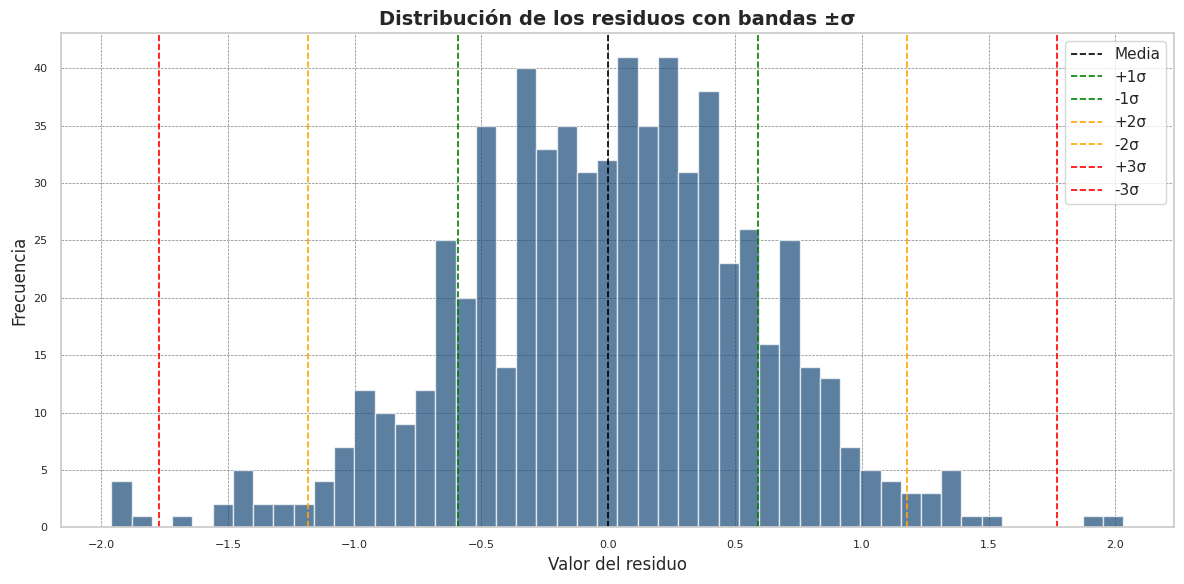

In [204]:

# Visualización
plt.figure()
plt.hist(residuos, bins=50, alpha=0.7,edgecolor='white')
plt.axvline(media, color='black', linestyle='--', label='Media')

# Líneas para ±1σ, ±2σ, ±3σ
for k, color in zip([1, 2, 3], ['green', 'orange', 'red']):
    plt.axvline(media + k * std, color=color, linestyle='--', label=f'+{k}σ')
    plt.axvline(media - k * std, color=color, linestyle='--', label=f'-{k}σ')

plt.title("Distribución de los residuos con bandas ±σ")
plt.xlabel("Valor del residuo")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# **Gráfico de Residuos de Modelo Propuesto**

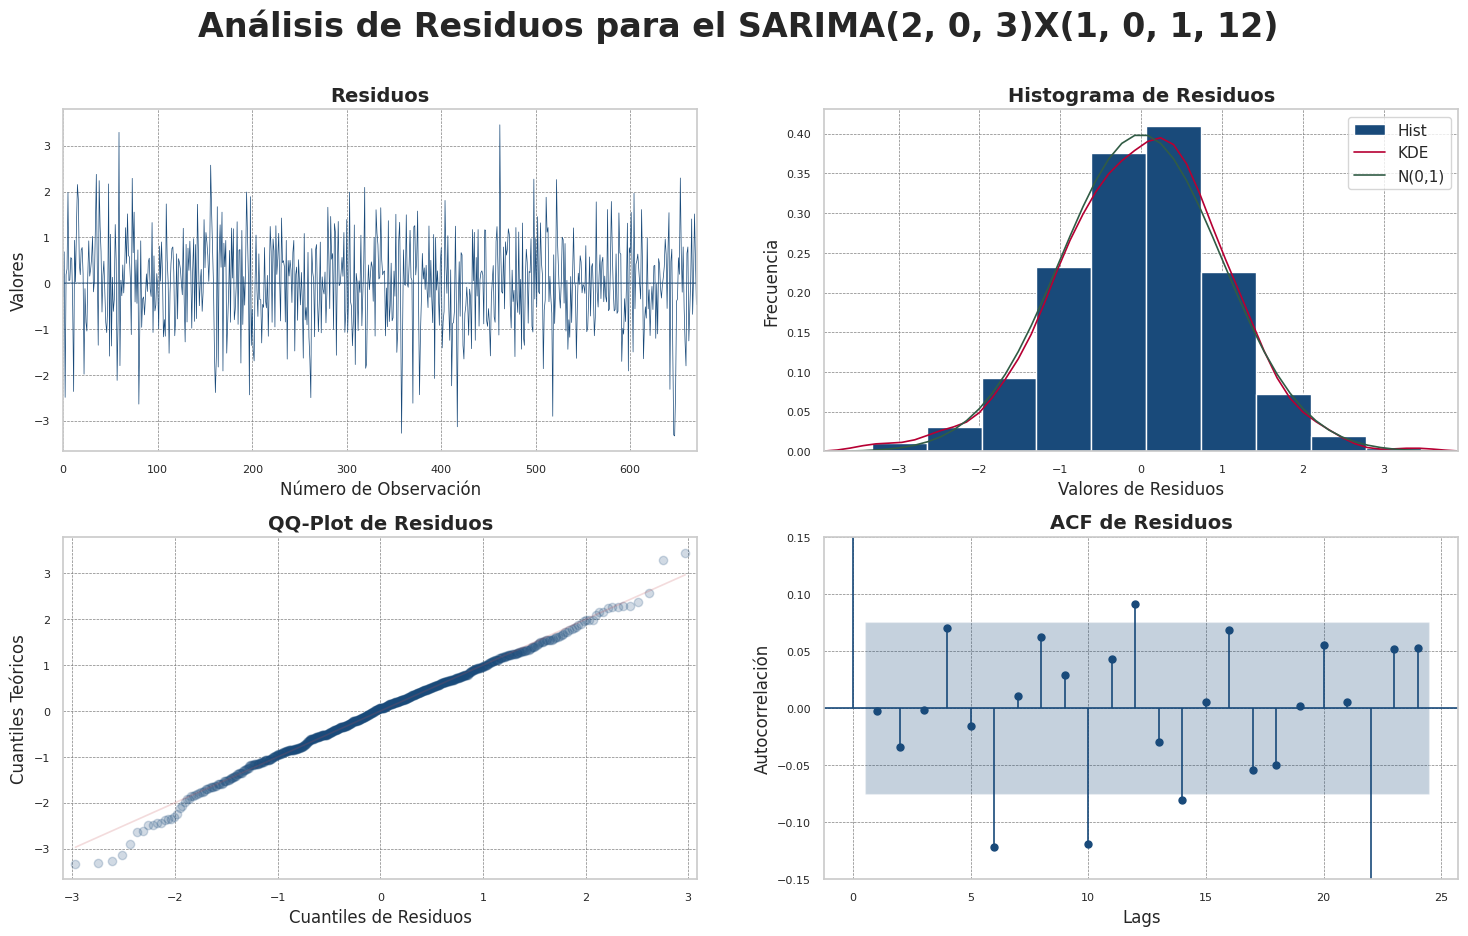

In [188]:
from matplotlib.collections import PathCollection

fig = modelo.plot_diagnostics(figsize=(18, 10), lags=24)

axes = fig.axes
# Cambiar el primer gráfico a la izquierda
axes[0].set_title("Residuos")
axes[0].set_ylabel("Valores")
axes[0].set_xlabel("Número de Observación")
for line in axes[0].lines:
    line.set_linewidth(0.5)

# Cambiar el segundo gráfico a la derecha
axes[1].set_title("Histograma de Residuos")
axes[1].set_ylabel("Frecuencia")
axes[1].set_xlabel("Valores de Residuos")
# Cambiar el color de las lineas


# Cambiar el tercer gráfico de abajo a la izquierda
axes[2].set_title("QQ-Plot de Residuos")
axes[2].set_ylabel("Cuantiles Teóricos")
axes[2].set_xlabel("Cuantiles de Residuos")
for line in axes[2].lines:
    # line.set_markerfacecolor('green')
    # line.set_markeredgecolor('white')
    line.set_alpha(0.2)

# Cambiar el cuarto gráfico de abajo a la derecha
axes[3].set_title("ACF de Residuos")
axes[3].set_ylabel("Autocorrelación")
axes[3].set_xlabel("Lags")
axes[3].set_ylim(-0.15, 0.15)

plt.subplots_adjust(hspace=0.25, wspace=0.2)
plt.suptitle("Análisis de Residuos para el SARIMA(2, 0, 3)X(1, 0, 1, 12)", fontsize=24, fontweight='bold')
plt.savefig('imagenes/05-analisis-de-residuos.svg', bbox_inches='tight')
plt.show()


# **FORECAST**

In [189]:
# Pronóstico para 12 meses hacia el futuro
forecast = modelo.forecast(steps=12)

In [190]:
# Obtener pronóstico con intervalos
pred = modelo.get_forecast(steps=12)

In [191]:
# Media pronosticada
forecast_mean = pred.predicted_mean
forecast_mean

array([-0.99789421, -1.03268914, -0.79171869, -0.33507254,  0.21001776,
        0.69302886,  0.98170271,  0.99825131,  0.74030119,  0.280943  ,
       -0.2519603 , -0.71135402])

In [192]:
# Intervalos de confianza
int_conf = pred.conf_int()
int_conf

array([[-2.15055255,  0.15476414],
       [-2.21937441,  0.15399614],
       [-1.98498861,  0.40155122],
       [-1.52885523,  0.85871016],
       [-0.98548498,  1.4055205 ],
       [-0.51120969,  1.89726741],
       [-0.23666782,  2.20007325],
       [-0.23249486,  2.22899748],
       [-0.49584324,  1.97644561],
       [-0.95546346,  1.51734947],
       [-1.49039038,  0.98646977],
       [-1.95845092,  0.53574287]])

In [193]:
# Obtenemos el forecast real
forecast_real = pt.inverse_transform(forecast_mean.reshape(-1, 1))

In [194]:
# Los intervalos de confianza reales
lower_bound_real = pt.inverse_transform(int_conf[:, 0].reshape(-1, 1))
upper_bound_real = pt.inverse_transform(int_conf[:, 1].reshape(-1, 1))

In [195]:
# Generate forecast dates and plot forecast series
forecast_index = pd.date_range(start=pre.index[-2], periods=13, freq='ME')[1:]

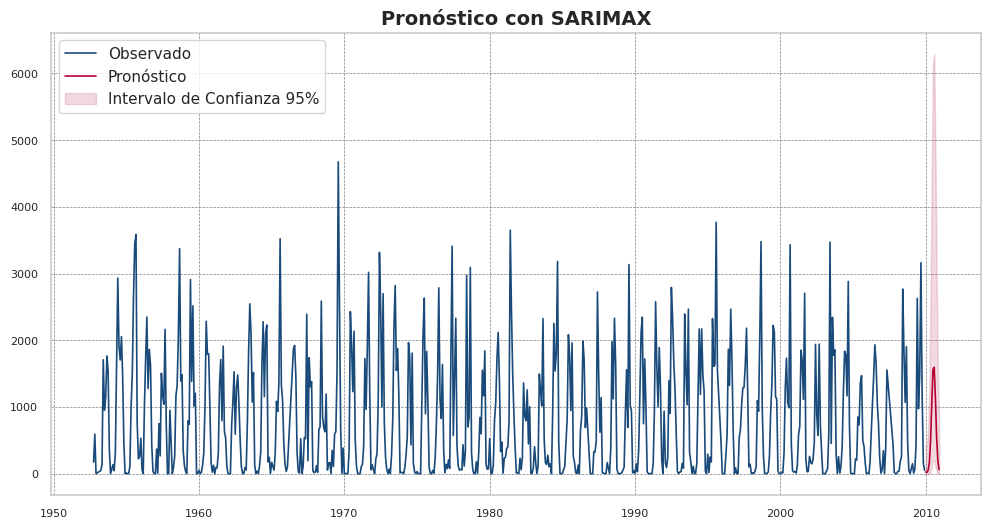

In [196]:
plt.figure()

# Serie original
plt.plot(pre, label='Observado')

# Pronóstico
plt.plot(forecast_index, forecast_real, label='Pronóstico', color=sns.color_palette()[1])

# Intervalos
plt.fill_between(forecast_index, 
                 lower_bound_real.flatten(),
                 upper_bound_real.flatten(),
                 color=sns.color_palette()[4], alpha=0.2, label='Intervalo de Confianza 95%')

plt.legend()
plt.title('Pronóstico con SARIMAX') 
plt.savefig('imagenes/06-pronostico-sarimax.svg', bbox_inches='tight')
plt.show()

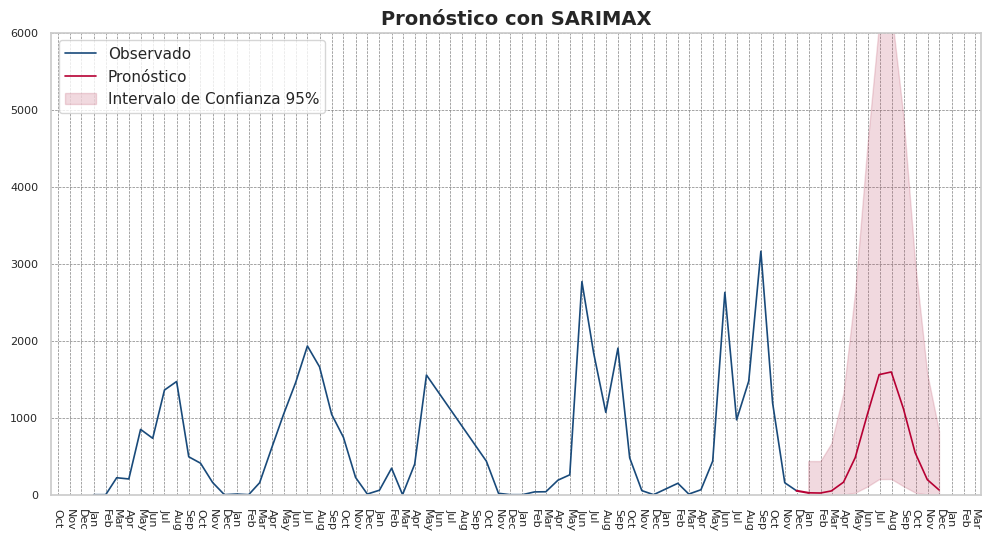

In [197]:
import matplotlib.dates as mdates

plt.figure()
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())           # set ticks every month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))    # format ticks to show abbreviated month

# Filter the observed series from 2005 onward
obs = pre[pre.index >= '2005-01-01']

# Plot the observed series
plt.plot(obs, label='Observado')
plt.plot(forecast_index, forecast_real, label='Pronóstico', color=sns.color_palette()[1])

# Add a red line connecting the last observed point with the first forecast point
last_obs_date = obs.index[-1]
last_obs_value = obs.iloc[-1]
first_fc_date = forecast_index[0]
first_fc_value = forecast_real[0, 0]
plt.plot([last_obs_date, first_fc_date], [last_obs_value, first_fc_value], color=sns.color_palette()[1], linewidth=1.5)

# Intervalos
plt.fill_between(forecast_index, 
                 lower_bound_real.flatten(),
                 upper_bound_real.flatten(),
                 color=sns.color_palette()[4], alpha=0.2, label='Intervalo de Confianza 95%')

plt.xticks(rotation=270, size=8)
plt.legend()
plt.title('Pronóstico con SARIMAX')
plt.ylim(0, 6000)
plt.grid(True)
plt.savefig('imagenes/07-pronostico-sarimax-zoom.svg', bbox_inches='tight')
plt.show()

# **PRONÓSTICO ÓPTIMO**

In [140]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  672
Model:             SARIMAX(9, 0, 2)x(2, 0, 2, 12)   Log Likelihood                -598.424
Date:                            Thu, 24 Apr 2025   AIC                           1228.847
Time:                                    15:31:44   BIC                           1301.012
Sample:                                         0   HQIC                          1256.796
                                            - 672                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3205      0.353      0.908      0.364      -0.371       1.012
ar.L2          0.5444      0.375      1.452      0.147      -0.191       1.279
ar.L3         -0.1267      0.083     -1.520      0.128      -0.290       0.037
ar.L4         -0.0983      0.057     -1.713      0.087      -0.211       0.014
ar.L5         -0.1701      0.050     -3.381      0.001      -0.269      -0.071
ar.L6         -0.2097      0.069     -3.034      0.002      -0.345      -0.074
ar.L7          0.0230      0.087      0.265      0.791      -0.147       0.193
ar.L8          0.1291      0.085      1.516      0.130      -0.038       0.296
ar.L9          0.1375      0.044      3.139      0.002       0.052       0.223
ma.L1         -0.0575      0.356     -0.162      0.871      -0.755       0.640
ma.L2         -0.4694      0.303     -1.549      0.121      -1.063       0.125
ar.S.L12       0.7938      4.852      0.164      0.870      -8.716      10.304
ar.S.L24       0.1024      4.427      0.023      0.982      -8.575       8.779
ma.S.L12      -0.7160      4.859     -0.147      0.883     -10.240       8.808
ma.S.L24      -0.0839      4.031     -0.021      0.983      -7.984       7.816
sigma2         0.3454      0.019     18.571      0.000       0.309       0.382
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.72
Prob(Q):                              0.96   Prob(JB):                         0.03
Heteroskedasticity (H):               0.83   Skew:                            -0.22
Prob(H) (two-sided):                  0.16   Kurtosis:                         3.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

$$
(1
- 1.7104 \, B 
+ 0.9855 \, B^2 
- 0.8782 \, B^{12})W_t=
(1
- 1.4789 \, B 
+ 0.7053 \, B^2 
+ 0.0654 \, B^3
- 0.8071 \, B^{12})\varepsilon_{t}
$$

$W_t = T(X_t)$ con la transformación de Yeo-Johnson y $\varepsilon_t \sim \mathcal{N}(0, 1)$

$$
W_t = 
1.7104 \, W_{t-1} 
- 0.9855 \, W_{t-2} 
+ 0.8782 \, W_{t-12}
+ \varepsilon_t 
- 1.4789 \, \varepsilon_{t-1} 
+ 0.7053 \, \varepsilon_{t-2} 
+ 0.0654 \, \varepsilon_{t-3} 
- 0.8071 \, \varepsilon_{t-12}
$$

$$
W_t(h) = 
1.71 \, \underset{t}{\mathbb{E}}[W_{t+h-1}] 
- 0.99 \, \underset{t}{\mathbb{E}}[W_{t+h-2}] 
+ 0.88 \, \underset{t}{\mathbb{E}}[W_{t+h-12}]
+ \underset{t}{\mathbb{E}}[\varepsilon_{t+h}] 
- 1.48 \, \underset{t}{\mathbb{E}}[\varepsilon_{t+h-1}] 
+ 0.71 \, \underset{t}{\mathbb{E}}[\varepsilon_{t+h-2}] 
+ 0.07 \, \underset{t}{\mathbb{E}}[\varepsilon_{t+h-3}] 
- 0.81 \, \underset{t}{\mathbb{E}}[\varepsilon_{t+h-12}]
$$

In [141]:
res = modelo.resid

In [142]:
pd.DataFrame(res).to_csv('residuos.csv', index=False)
pd.DataFrame(ypre).to_csv('ypre.csv', index=False)

In [143]:
from pronostico_optimo import *

In [144]:
pronosticos, lower, upper = po(H=12, modelo=modelo, ypre=ypre, res=res, t0=671)

In [145]:
# inversa de Yeo-Jhonson
pronostico_real_eco = pt.inverse_transform(pronosticos)
lower_real_eco = pt.inverse_transform(lower)
upper_real_eco = pt.inverse_transform(upper)

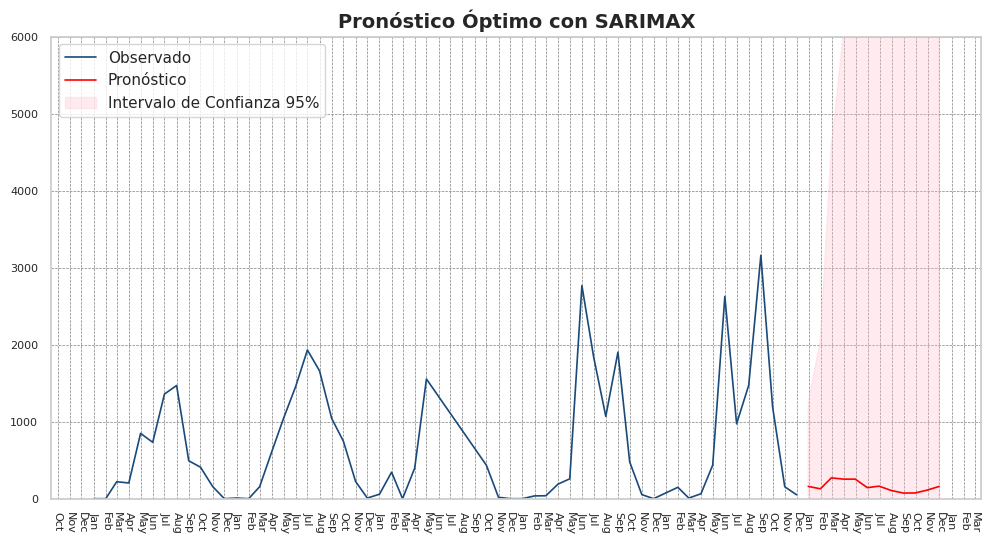

In [146]:
import matplotlib.dates as mdates

plt.figure()
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())  # set ticks every month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # format ticks to show abbreviated month

# Filter the observed series from 2005 onward
obs = pre[pre.index >= '2005-01-01']

# Plot the observed series
plt.plot(obs, label='Observado')
plt.plot(forecast_index, pronostico_real_eco, label='Pronóstico', color='red')


# Intervalos
plt.fill_between(forecast_index, 
                 lower_real_eco.flatten(),
                 upper_real_eco.flatten(),
                 color='pink', alpha=0.3, label='Intervalo de Confianza 95%')

plt.xticks(rotation=270, size=8)
plt.legend()
plt.title('Pronóstico Óptimo con SARIMAX')
plt.ylim(0, 6000)
plt.grid(True)
plt.savefig('imagenes/08-pronostico-optimo-sarimax.svg', bbox_inches='tight')
plt.show()